In [55]:
!pip install plotly==4.8.1
!pip install chart_studio

In [3]:
!pip uninstall statsmodels
!pip install numpy scipy patsy pandas 
!pip install statsmodels

Uninstalling statsmodels-0.10.2:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/statsmodels-0.10.2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 8.7MB 2.8MB/s 


In [0]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet

import statsmodels.api as sm
from scipy import stats
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-whitegrid")

In [0]:
#load the dataset using pandas
data = pd.read_csv("sp_500_historical.csv");

In [58]:
print(data.tail(5));

            Date         Open  ...    Adj Close      Volume
1528  2020-06-08  3199.919922  ...  3232.389893  8437380000
1529  2020-06-09  3213.320068  ...  3207.179932  6382620000
1530  2020-06-10  3213.419922  ...  3190.139893  6570840000
1531  2020-06-11  3123.530029  ...  3002.100098  7018890000
1532  2020-06-12  3071.040039  ...  3041.310059  5832250000

[5 rows x 7 columns]


In [59]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1.533000e+03
mean,2441.485401,2453.078030,2428.546694,2441.686384,2441.686384,3.724554e+09
std,394.788568,396.491689,392.840533,394.625184,394.625184,9.288456e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09
25%,2080.590088,2088.489990,2069.800049,2080.149902,2080.149902,3.213570e+09
50%,2400.560059,2410.340088,2389.379883,2399.629883,2399.629883,3.535080e+09
75%,2787.340088,2796.979980,2768.639893,2784.489990,2784.489990,3.970150e+09
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09


We need to make sure if the date column is either a categorical type or a datetype. In our case date is a categorical datatype so we need to change it to datetime.

In [0]:
# Create a copy to avoid the SettingWarning .loc issue 
data_df = data.copy()
# Change to datetime datatype.
data_df.loc[:, 'Date'] = pd.to_datetime(data.loc[:,'Date'], format="%Y/%m/%d")

In [61]:
data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1.533000e+03
mean,2441.485401,2453.078030,2428.546694,2441.686384,2441.686384,3.724554e+09
std,394.788568,396.491689,392.840533,394.625184,394.625184,9.288456e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09
25%,2080.590088,2088.489990,2069.800049,2080.149902,2080.149902,3.213570e+09
50%,2400.560059,2410.340088,2389.379883,2399.629883,2399.629883,3.535080e+09
75%,2787.340088,2796.979980,2768.639893,2784.489990,2784.489990,3.970150e+09
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09


In [62]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1533 non-null   datetime64[ns]
 1   Open       1533 non-null   float64       
 2   High       1533 non-null   float64       
 3   Low        1533 non-null   float64       
 4   Close      1533 non-null   float64       
 5   Adj Close  1533 non-null   float64       
 6   Volume     1533 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 84.0 KB


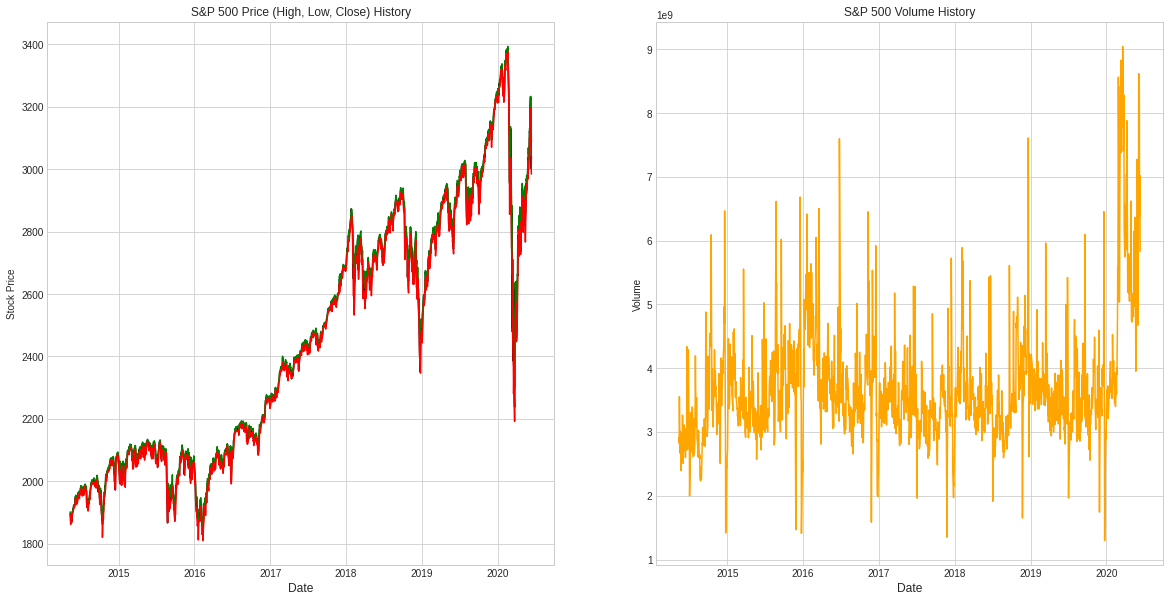

In [69]:
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(data_df["Date"], data_df["Close"], color="black")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("S&P 500 Close Price History")

# Second Subplot
ax1.plot(data_df["Date"], data_df["High"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("S&P High Price History")

# Third Subplot
ax1.plot(data_df["Date"], data_df["Low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("S&P 500 Price (High, Low, Close) History")

# Fourth Subplot
ax2.plot(data_df["Date"], data_df["Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Volume")
ax2.set_title("S&P 500 Volume History")
plt.show()

**Prophet introduction**

> Prophet is a library developed by facebook research team fro time series forecasting.Prophet works well with data set that is highly influenced by seasonality like ( Online Sales Data, Enterprise Sales Data, Travel, Electricity Bills, etc.)




**Steps for using Prophet:**
1.   Make sure you replace closing price for y and date for ds.
2.   Fit that dataframe to Prophet in order to detect future patterns.
3. Predict the upper and lower prices of the closing price.

In [0]:
prophet = Prophet()

In [15]:
# Drop the columns
prophet_df = data_df.drop(['Open', 'High', 'Low','Volume','Adj Close'], axis=1)
prophet_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

prophet_df.head()

,ds,y
0,2014-05-13,1897.449951
1,2014-05-14,1888.530029
2,2014-05-15,1870.849976
3,2014-05-16,1877.859985
4,2014-05-19,1885.079956


In [16]:
prophet.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future_prices = prophet.make_future_dataframe(periods=365)

In [19]:
future_prediction = prophet.predict(future_prices)
future_prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1893,2021-06-08,3193.781448,2847.351953,3509.910552
1894,2021-06-09,3193.507616,2851.792206,3521.212351
1895,2021-06-10,3194.269570,2842.682896,3494.789200
1896,2021-06-11,3194.965066,2858.496679,3530.004100
1897,2021-06-12,3175.330359,2821.582173,3498.267025


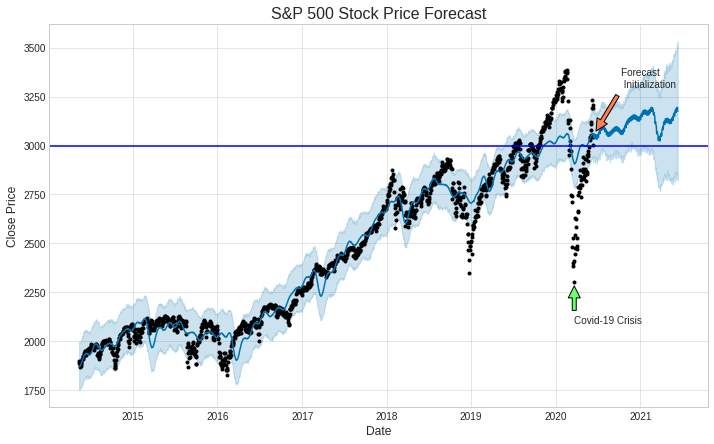

In [71]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2020, 10, 12)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2020, 3, 22)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2020, 6, 12)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for S&P 500.
fig = prophet.plot(future_prediction)
ax1 = fig.add_subplot(111)
ax1.set_title("S&P 500 Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 3050), xytext=(starting_date1,3300),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Covid-19 Crisis', xy=(trend_date1, 2300), xytext=(trend_date1,2090),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=3000, color='b', linestyle='-')

plt.show()

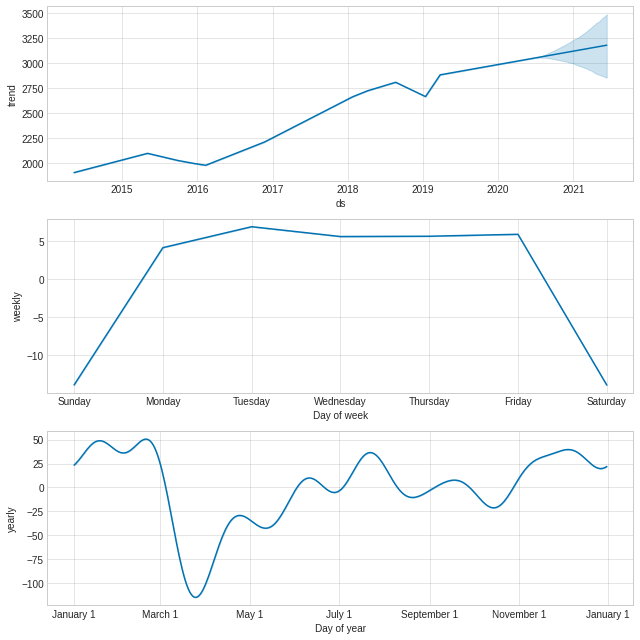

In [37]:
fig2 = prophet.plot_components(future_prediction)
plt.show()

In [38]:
trace = go.Ohlc(x=data_df['Date'],
                open=data_df['Open'],
                high=data_df['High'],
                low=data_df['Low'],
                close=data_df['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'S&P 500 Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'President Donald Trump <br> takes Office'
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')


In [72]:
data_df['month_year'] = pd.to_datetime(data_df['Date']).dt.to_period('M')

# 2020 onwards
last_year = data_df.loc[data_df['Date'].dt.year > 2019]
g = last_year.groupby(["Date"])
monthly_averages = g.aggregate({"Open": np.mean, "High": np.mean, "Low": np.mean, "Close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

monthly_averages.dtypes


trace = go.Candlestick(x=monthly_averages['Date'],
                       open=monthly_averages['Open'].values.tolist(),
                       high=monthly_averages['High'].values.tolist(),
                       low=monthly_averages['Low'].values.tolist(),
                       close=monthly_averages['Close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))


layout = {
    'title': 'S&P 500 Historical Price <br> <i>A closer look to the Downward trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')


In [44]:
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month_year
0,2014-05-13,1896.750000,1902.170044,1896.060059,1897.449951,1897.449951,2915680000,2014-05
1,2014-05-14,1897.130005,1897.130005,1885.770020,1888.530029,1888.530029,2822060000,2014-05
2,2014-05-15,1888.160034,1888.160034,1862.359985,1870.849976,1870.849976,3552640000,2014-05
3,2014-05-16,1871.189941,1878.280029,1864.819946,1877.859985,1877.859985,3173650000,2014-05
4,2014-05-19,1876.660034,1886.000000,1872.420044,1885.079956,1885.079956,2664250000,2014-05


In [0]:
# Moving Averages (10, 50 and 200)
data_df['10_d_avg'] = data_df.Close.rolling(window=10).mean()
data_df['50_d_avg'] = data_df.Close.rolling(window=50).mean()
data_df['200_d_avg'] = data_df.Close.rolling(window=200).mean()
close_p = data_df['Close'].values.tolist()


# Variables to insert into plotly
ten_d = data_df['10_d_avg'].values.tolist()
fifty_d = data_df['50_d_avg'].values.tolist()
twoh_d = data_df['200_d_avg'].values.tolist()
date = data_df['Date'].values.tolist()

# Set date as index
data_df = data_df.set_index('Date')

In [89]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']
# for i,c in zip(range(n),color):
#    ax1.plot(x, y,c=c)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': data_df.index, 'y': data_df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['Close']:
    fig.append_trace({'x': data_df.index, 'y': data_df[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 1, 1)
    
fig['layout'].update(height=800,title='Relationship between Moving Average\'s and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')

In [90]:
# Take off the date index
data_df = data_df.reset_index()

# Plotly
trace0 = go.Scatter(
    x = data_df['Date'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ('#ff6347'),
        width = 4)
)
trace1 = go.Scatter(
    x = data_df['Date'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
    dash="dot")
)
trace2 = go.Scatter(
    x = data_df['Date'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)

data = [trace0, trace1, trace2]


# Edit the layout
layout = dict(title = 'Moving Averages for S&P 500',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'),
              annotations=[
        dict(
            x='2020-03-03',
            y=3264,
            xref='x',
            yref='y',
            text='<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
            showarrow=True,
            arrowhead=5,
            ax=5,
            ay=-50
        ), dict(
        x = "2020-06-03",
        y = 3007,
        text = "<i>Upward trend after <br> 10-day crosses <br>200-day moving average </i>",
        textangle = 0,
        ax = 50,
        ay = 50,
        font = dict(
          color = "black",
          size = 12
        )
        )],
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')